In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

from google.colab import files
uploaded = files.upload()

Saving 202501.xlsx to 202501.xlsx


In [2]:
# 데이터 불러오기
df = pd.read_excel('202501.xlsx')

In [3]:
# 날짜 컬럼 datetime 변환
df['Pump-Begin'] = pd.to_datetime(df['Pump-Begin'], errors='coerce')

In [4]:
# 금속 컬럼 추출 (ng/m3)
metal_columns = [col for col in df.columns if '(ng/m3)' in col]

In [5]:
# 금속 음수값 Nan 처리
df[metal_columns] = df[metal_columns].applymap(lambda x: x if x >= 0 else None)

/tmp/ipython-input-2460336799.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[metal_columns] = df[metal_columns].applymap(lambda x: x if x >= 0 else None)


In [6]:
# 총 금속 농도 계산
df['Total_Metals'] = df[metal_columns].sum(axis=1)

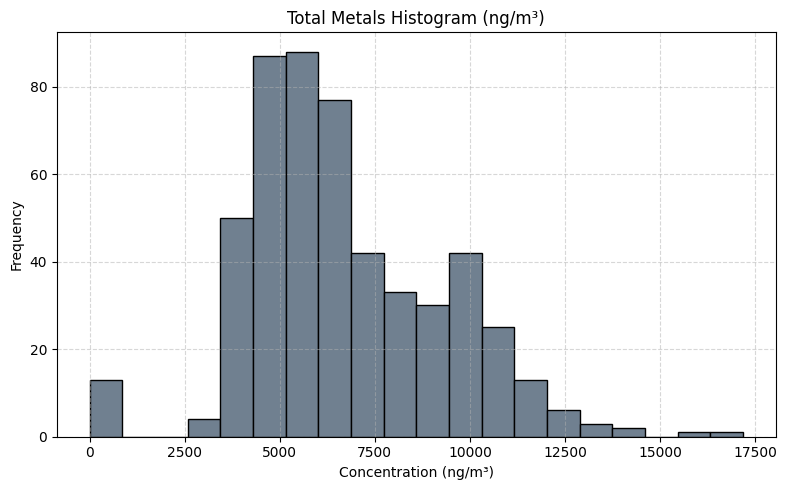

In [7]:
# 총 금속 히스토그램 생성
plt.figure(figsize=(8, 5))
plt.hist(df['Total_Metals'].dropna(), # 히스토그램 생성
         bins='auto', # bin 개수 자동 설정
         edgecolor='black',
         color='slategray')
plt.title("Total Metals Histogram (ng/m³)")
plt.xlabel("Concentration (ng/m³)")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)

# 그래프 출력
plt.tight_layout()
plt.show()